In [1]:
from glob import glob
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch as pt
from stl import mesh
from scipy.signal import welch
#from flowtorch.data import FOAMDataloader, mask_box
from utils import fetch_force_coefficients, interpolate_uniform_1D

%matplotlib inline
mpl.rcParams['figure.dpi'] = 800
#mpl.rc('text', usetex=True)
plt.rcParams.update({'font.size': 7})
font_size = 10

print("Matplolib version: ", mpl.__version__)
print("Numpy version: ", np.__version__)

Matplolib version:  3.5.2
Numpy version:  1.23.0


# Comparison of $c_D$ and $c_L$ for the HiSA and rhoCentralFoam

This comparison is carried out on a test case `./test_cases/rhoCF_set1_alpha4_sa_ref1` and `./test_cases/HiSA/hisa_set1_alpha4_sa_ref1`.

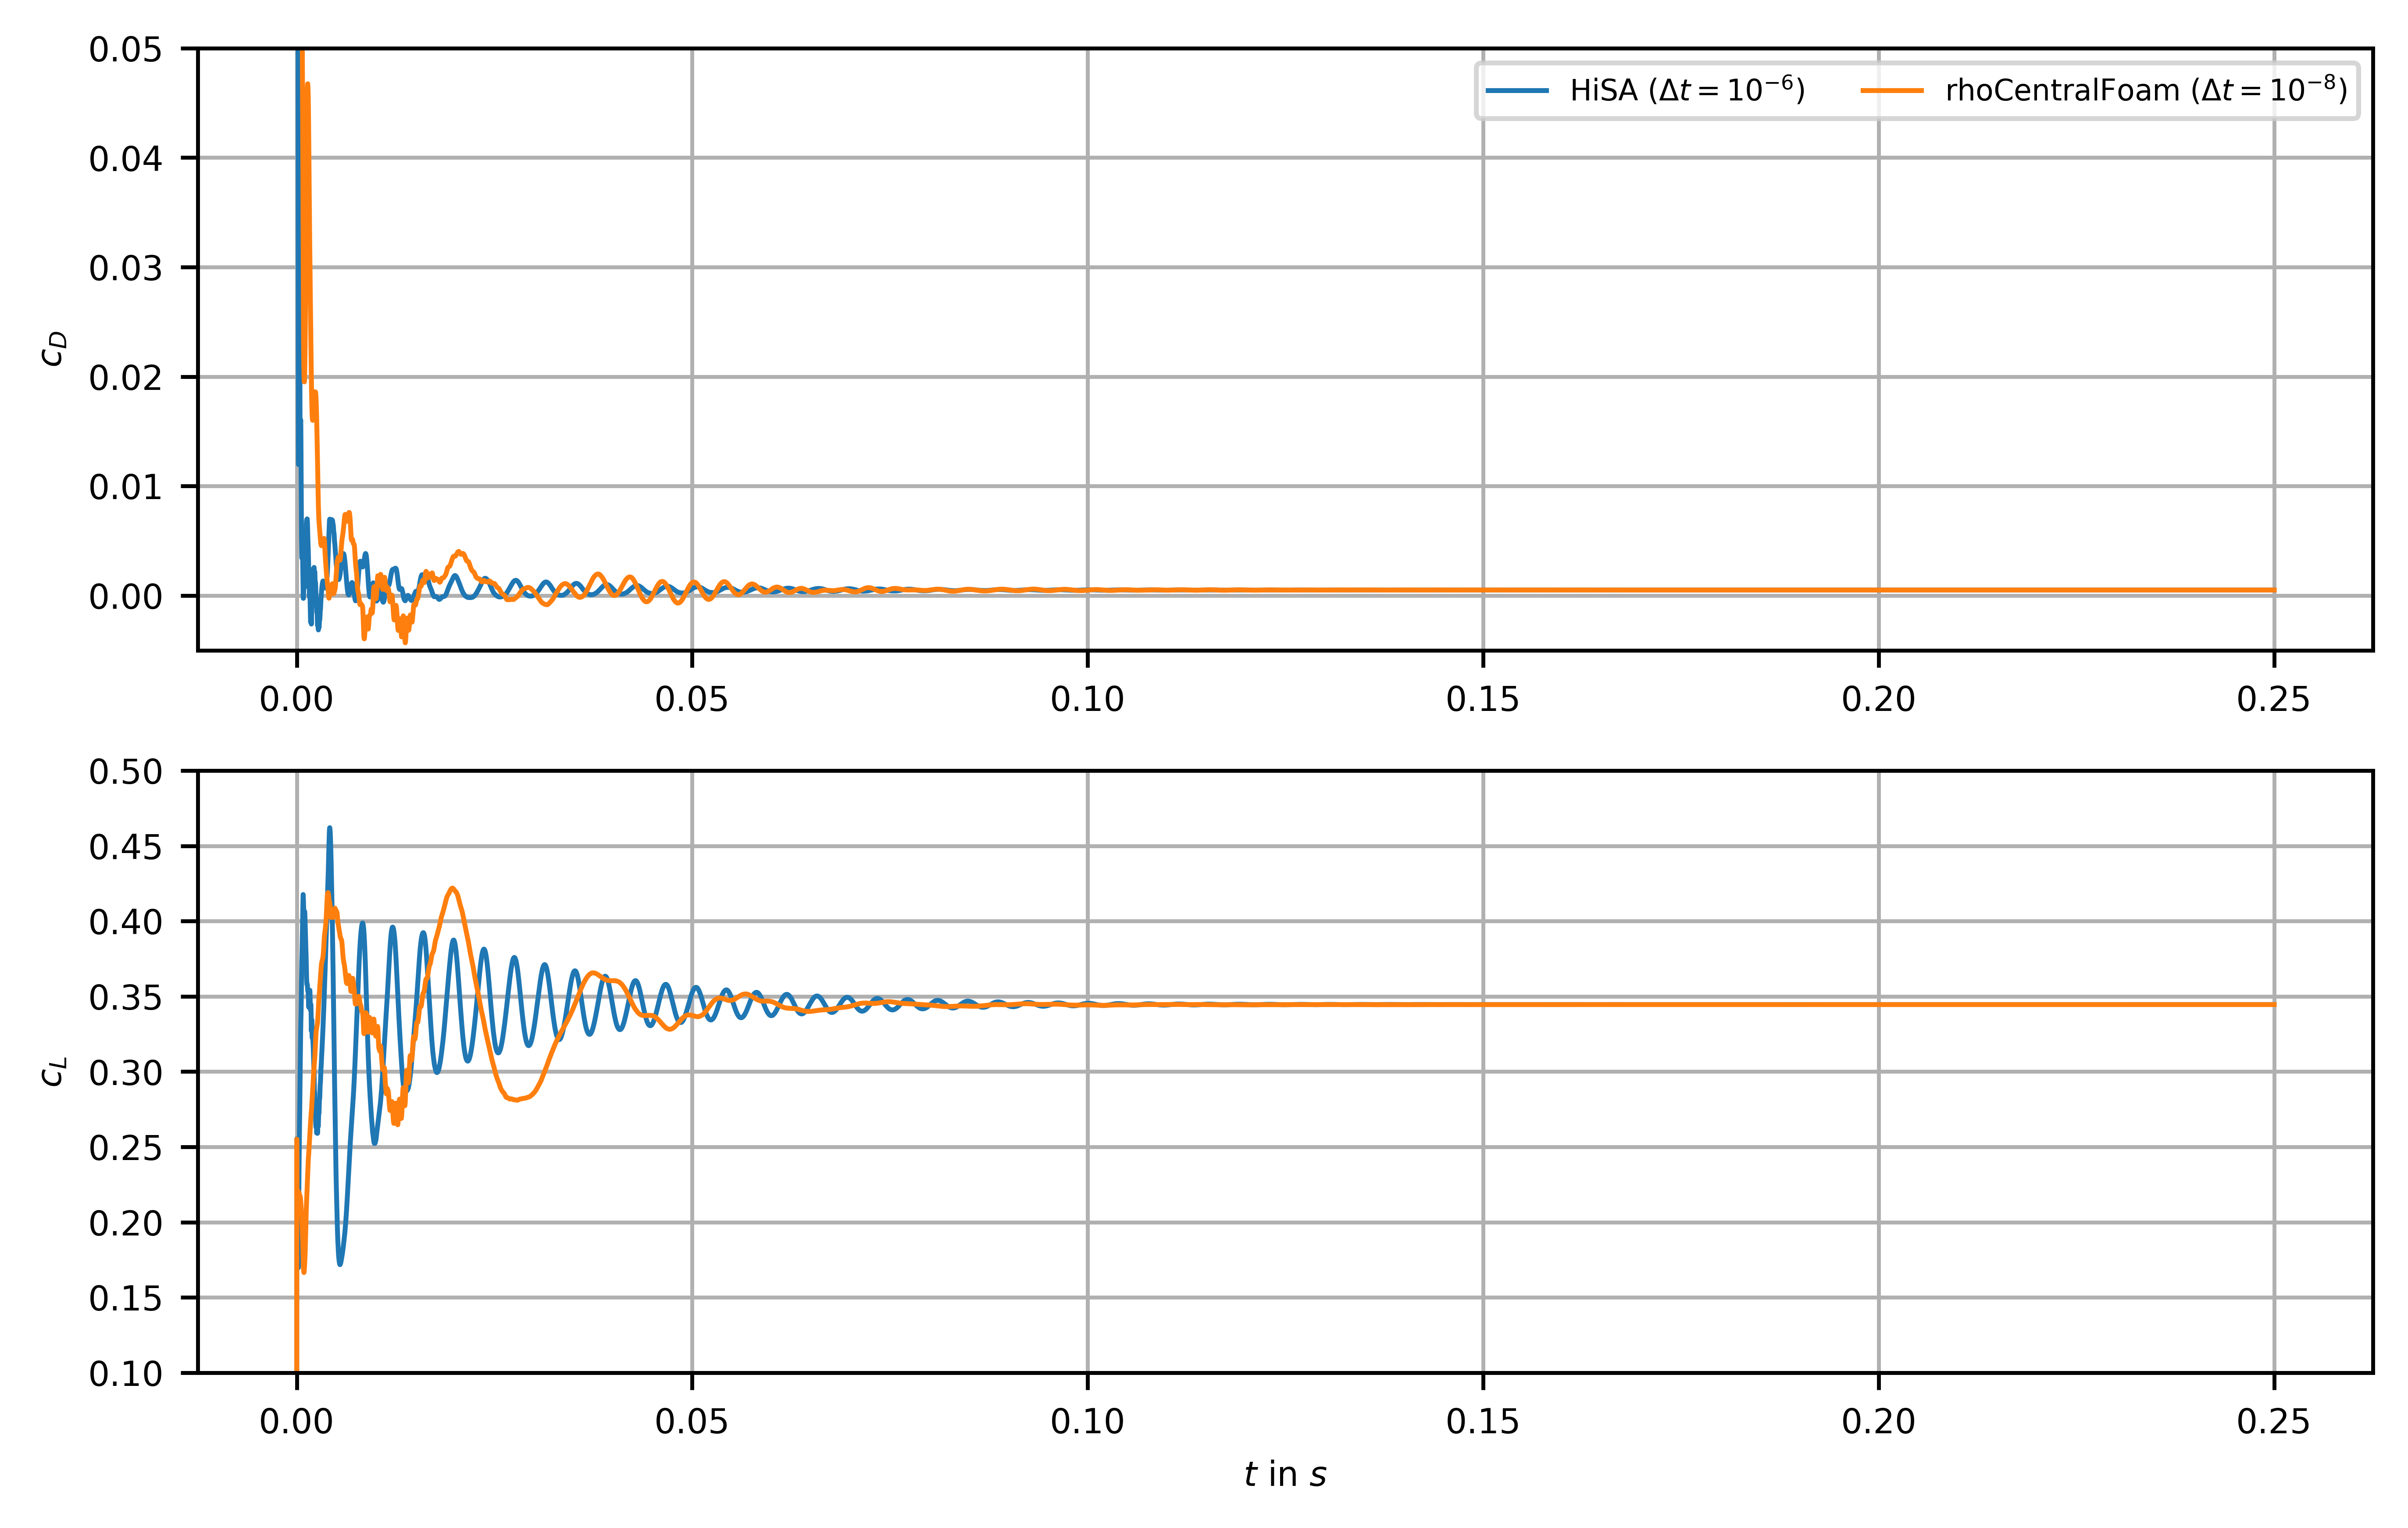

In [4]:
lw = 1.0
every = 5
cases = ["mod", "mod1"]
labels= [r"HiSA ($\Delta t = 10^{-6}$)", r"rhoCentralFoam ($\Delta t = 10^{-8}$)"]
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 5))
names = ["t", "Cd", "Cs", "Cl", "CmRoll", "CmPitch",
             "CmYaw", "Cd_f", "Cd_r", "Cs_f", "Cs_r", "Cl_f", "Cl_r"]
for i, case in enumerate(cases):
    df_list = []
    file_path = "data/" + case + "/postProcessing/forces/0/coefficient.dat"
    df_list.append(pd.read_csv(file_path, sep="\t", skiprows=range(13), header=None, names=names, low_memory=False))
    t, cd, cl = np.split(pd.concat(df_list)[["t", "Cd", "Cl"]].values, 3, 1)
    ax1.plot(t[::every], cd[::every], c="C{:d}".format(i), lw=lw, label=labels[i])
    ax2.plot(t[::every], cl[::every], c="C{:d}".format(i), lw=lw)

ax1.legend(fontsize=6, ncol=3, loc=1)
ax1.set_ylabel(r"$c_D$")
ax2.set_ylabel(r"$c_L$")
ax2.set_xlabel(r"$t$ in $s$")
ax1.set_ylim(-0.005, 0.05)
ax2.set_ylim(0.1, 0.5)
ax1.grid()
ax2.grid()

#fig.savefig("./cd_cl.png")

# Simulation Runtime

| Solver           | time-step ($\Delta t$) | Execution time | Wall-clock time |
| -----------      | -----------            | -----------    | -----------     |
| HiSA             | $10^{-6}$              | 180000         | 181000          |
| rhoCentralFoam   | $10^{-8}$              | 200000         | 210000          |


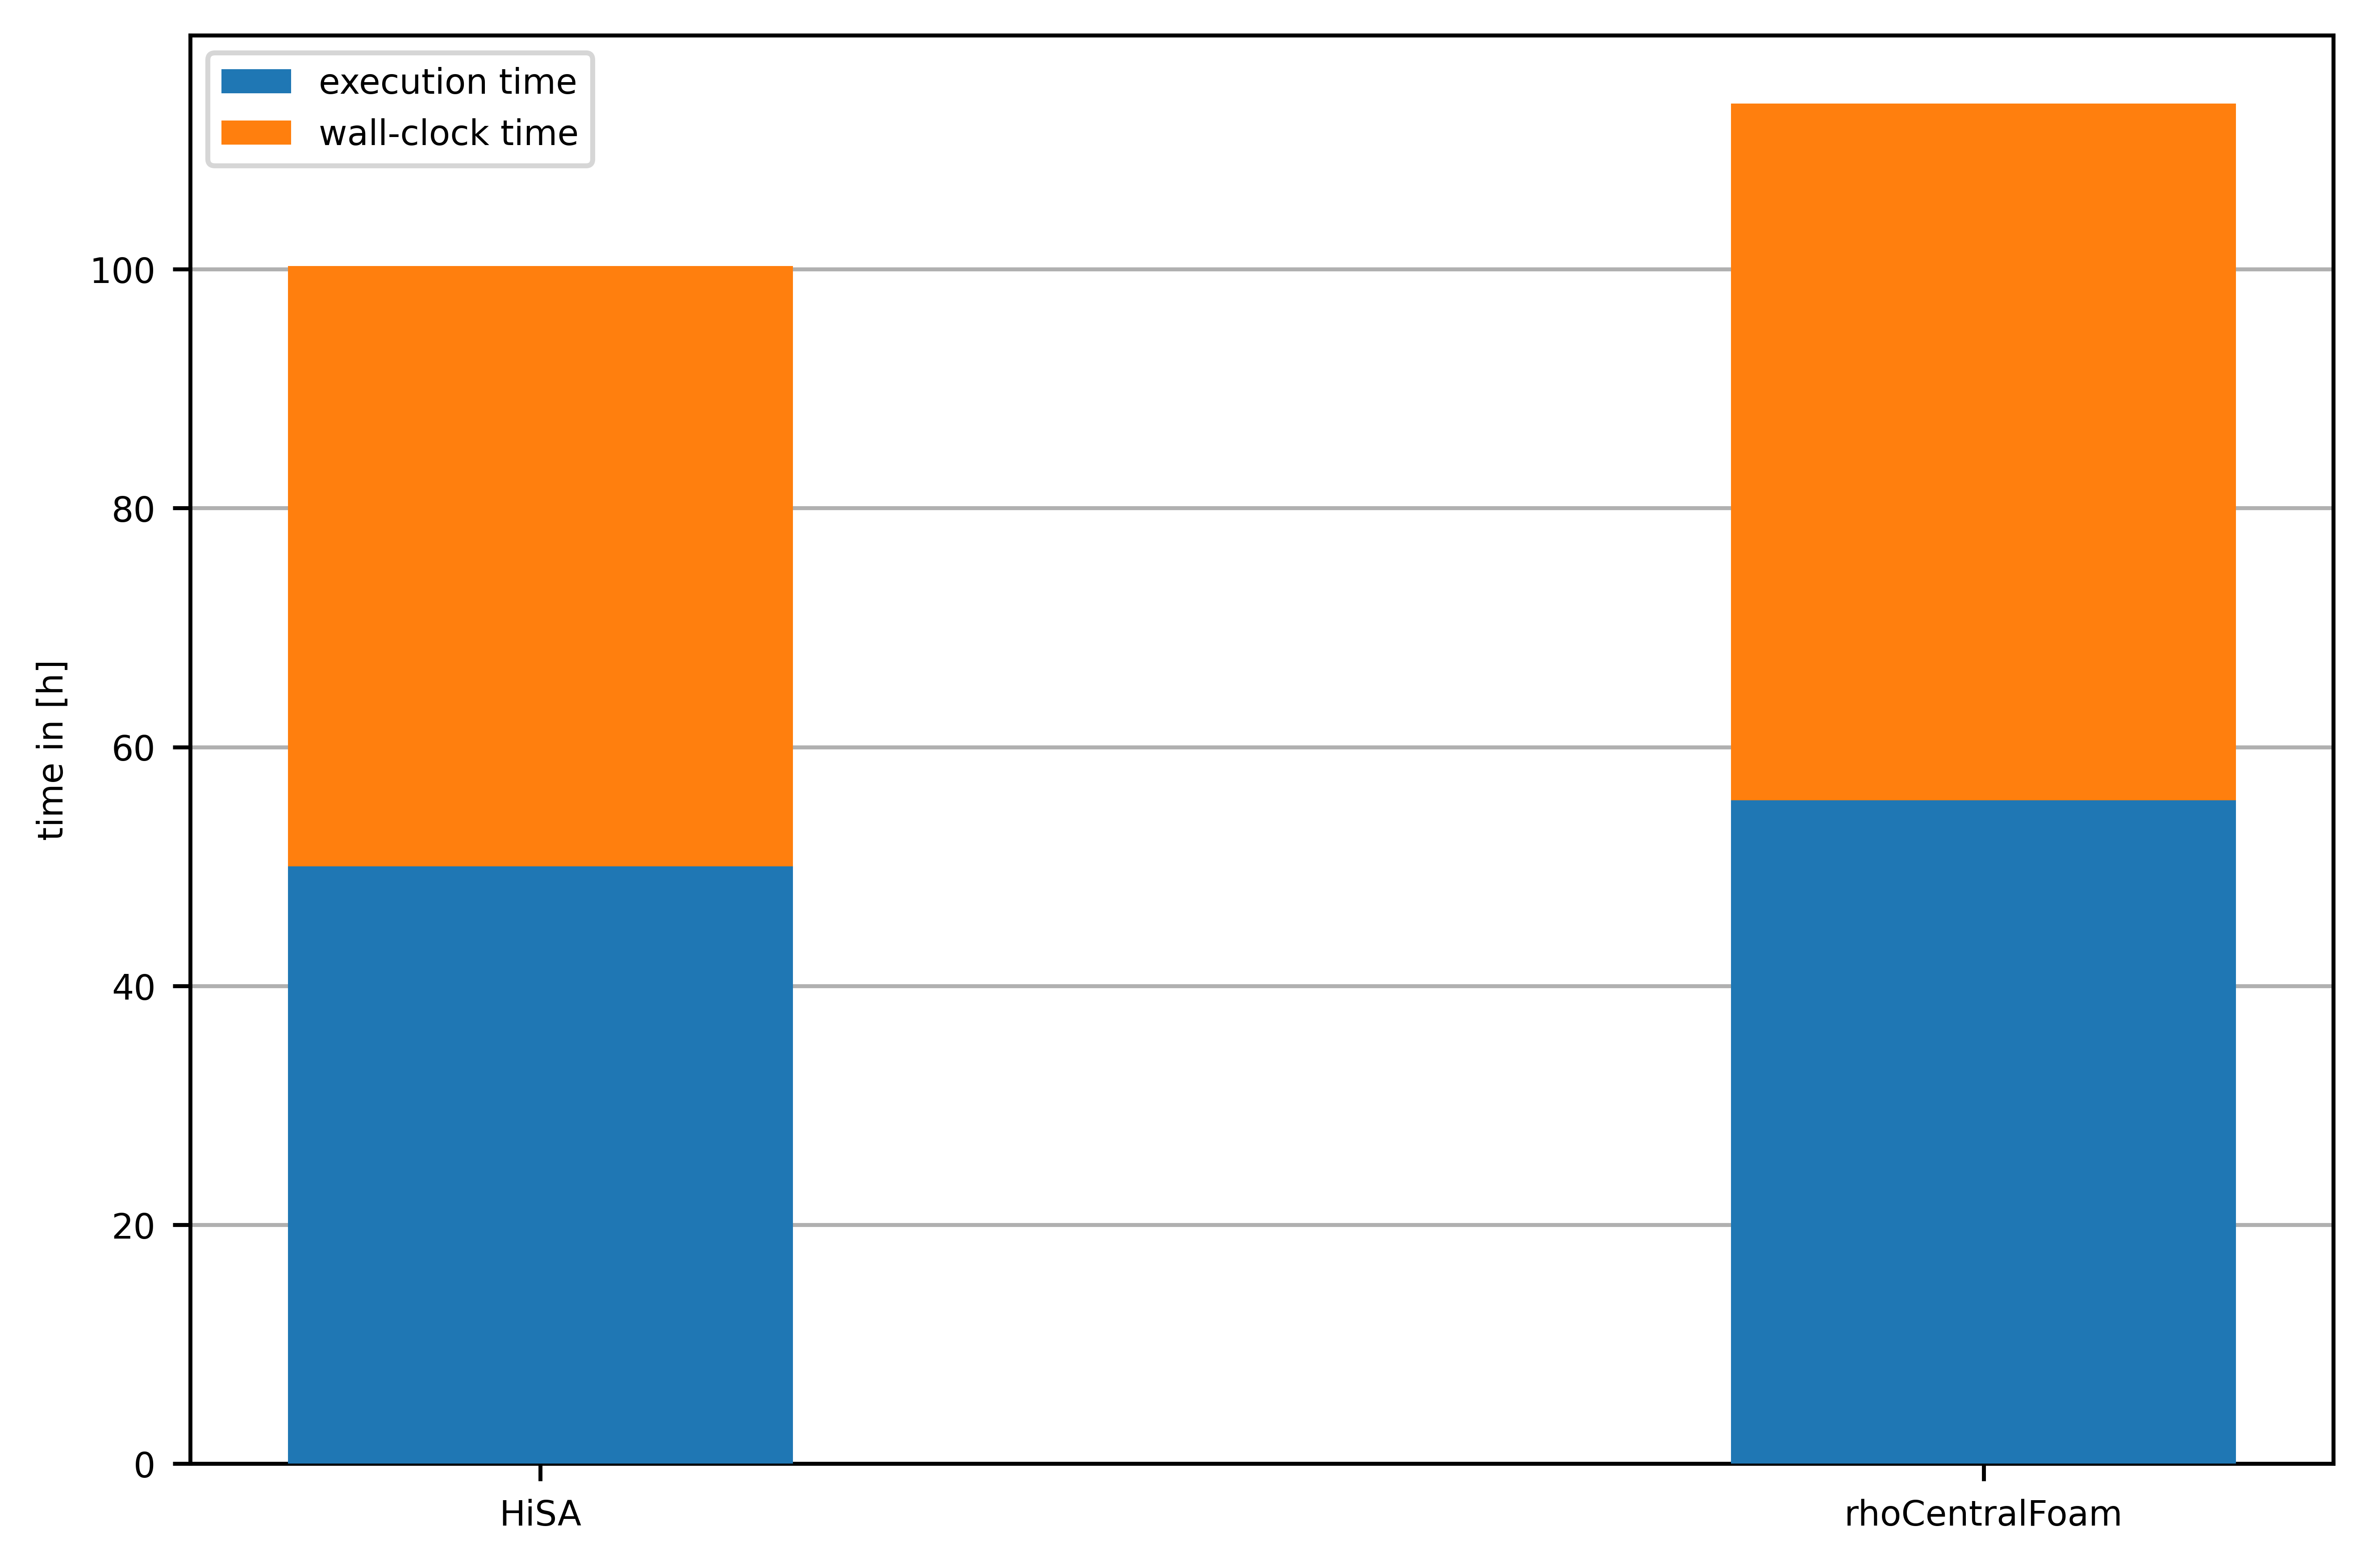

In [3]:
exec_time = [180000/3600,200000/3600]  # HiSA, rhoCF  -> in seconds
clock_time = [181000/3600,210000/3600]  # HiSA, rhoCF -> in seconds
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(np.arange(len(exec_time)), exec_time, width, color='C0', zorder=3)
ax.bar(np.arange(len(clock_time)), clock_time, width, bottom=exec_time, color='C1', zorder=3)
ax.set_ylabel('time in [h]')
ax.set_xticks([0,1], ('HiSA', 'rhoCentralFoam'))
ax.legend(labels=['execution time', 'wall-clock time'])
ax.grid(axis='y', zorder=0)